C:\Python35\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: divide by zero encountered in log


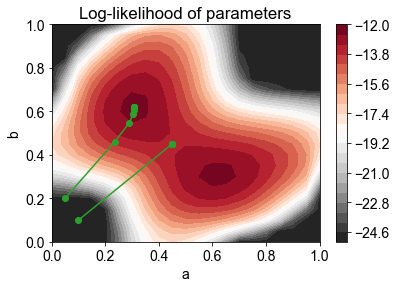

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14
data = np.array([6, 2, 8, 3, 3, 5])
n = 10 # number of tosses

def get_assignment_probability(a):
    assignment_prob = []
    for d in data:
        likelihood = binom.pmf(d, n, a)
        assignment_prob.append(likelihood)
    return np.array(assignment_prob)

def get_parameters(z):
    probs = data/n
    a = np.average(probs,weights=z)
    b = np.average(probs,weights=1-z)
    return a,b

def get_likelihood(a,b,z):
    log_likelihood = 0
    for i, d in enumerate(data):
        likelihood = z[i]*binom.pmf(d, n, a) + (1-z[i])*binom.pmf(d, n, b)
        log_likelihood += np.log(likelihood)
    return log_likelihood
        
x = np.linspace(0, 1, 21)
y = np.linspace(0, 1, 21)
X, Y = np.meshgrid(x, y)
z = 1/2*np.ones(shape=data.shape)
ll = get_likelihood(X, Y, z)
np.clip(ll,a_min=-25,a_max=None,out=ll)
plt.contourf(X, Y, ll, 20, cmap='RdGy_r');
plt.colorbar();
plt.xlabel('a')
plt.ylabel('b')
plt.title('Log-likelihood of parameters')

def em(a, b):
    z = np.zeros(shape=data.shape,dtype=float)
    a_s = [a]
    b_s = [b]
    for _ in range(10):
        z1 = get_assignment_probability(a)
        z2 = get_assignment_probability(b)
        z = z1/(z1 + z2)
        a, b = get_parameters(z)
        a_s.append(a)
        b_s.append(b)
    
    plt.plot(a_s,b_s,'C2-o')

em(0.05, 0.2)
em(0.1, 0.1)
plt.savefig('EM_Algorithm.png')